


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv',delimiter=";")

In [3]:
products_df = pd.read_csv('/datasets/products.csv',delimiter=";")

In [4]:
aisles_df = pd.read_csv('/datasets/aisles.csv',delimiter=";")

In [5]:
depart_df = pd.read_csv('/datasets/departments.csv',delimiter=";")

In [6]:
orderprod_df = pd.read_csv('/datasets/order_products.csv',delimiter=";")

In [7]:
print(orders_df.info())
print()
print(products_df.info())
print()
print(aisles_df.info())
print()
print(depart_df.info())
print()
print(orderprod_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory 

## Conclusões

Parece que os dados carregados estão formatados como uma única coluna isso pode ter acontecido porque o arquivo CSV usa um delimitador diferente (como ; em vez de ,).

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução
Para solucionar os problemas acima irei utilizar os metodos: delimiter para separar as colunas corretamente, metodo fillna para preencher os valores ausentes e o metodo drop_duplicated para substituir os valores em branco.

Acredito que dessa forma consigo iniciar o tratamento dos dados.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [8]:
print("Numero de duplicados =",orders_df.duplicated().sum())


Numero de duplicados = 15


In [9]:
# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras.

wednesday_orders = orders_df[(orders_df['order_hour_of_day'] == 2) & (orders_df['order_dow'] == 3)]

print("Numero de pedidos feitos =", len(wednesday_orders))


Numero de pedidos feitos = 121


In [10]:
# Remova pedidos duplicados

orders_df.drop_duplicates(subset='order_id', inplace=True)

In [11]:
# Verifique as linhas duplicadas mais uma vez

print("Numero de duplicados =",orders_df.duplicated().sum())

Numero de duplicados = 0


In [12]:
# Verifique novamente apenas os IDs de pedidos duplicados

id_duplicated_order = orders_df[orders_df['user_id'].duplicated(keep=False)]

print("Numero de id duplicado =", len(id_duplicated_order))


Numero de id duplicado = 423595




Fiz a identificaçao das linhas duplicadas e remocao das mesmas.
Validei a limpeza atraves das ultimas duas verificacoes puxando tanto a coluna id dos usuarios como os pedidos.

### DataFrame `products`

In [13]:
# Verifique se há linhas completamente duplicadas

print("Numero de duplicados =",products_df.duplicated().sum())

Numero de duplicados = 0


In [14]:
# Verifique apenas IDs dos produtos duplicados

id_duplicated_prod = products_df[products_df['product_id'].duplicated(keep=False)]

print("Numero de id duplicado =", len(id_duplicated_prod))

Numero de id duplicado = 0


In [15]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

products_df['product_name'] = products_df['product_name'].str.lower()

duplicated_prod = products_df[products_df['product_name'].duplicated()]

print("Produtos duplicados =", len(duplicated_prod))

Produtos duplicados = 1361


In [16]:
# Verifique os nomes de produtos duplicados que não estão faltando

non_na_products_df = products_df[products_df['product_name'].notna()]

print("Produtos nao duplicados =", len(id_duplicated_prod))


Produtos nao duplicados = 0


### DataFrame `departments`

In [17]:
print("Numero de duplicados =",depart_df.duplicated().sum())


Numero de duplicados = 0


In [18]:
# Verifique apenas se há IDs dos produtos duplicados

id_duplicated_depart = depart_df[depart_df['department_id'].duplicated(keep=False)]

print("Numero de id duplicado =", len(id_duplicated_depart))

Numero de id duplicado = 0


### DataFrame `aisles`

In [19]:
# Verifique se há linhas completamente duplicadas

print("Numero de duplicados =",aisles_df.duplicated().sum())

Numero de duplicados = 0


In [20]:
# Verifique apenas se há IDs dos produtos duplicados

id_duplicated_aisles = aisles_df[aisles_df['aisle_id'].duplicated(keep=False)]

print("Numero de id duplicado =", len(id_duplicated_aisles))

Numero de id duplicado = 0


### DataFrame `order_products`

In [21]:
# Verifique se há linhas completamente duplicadas

print("Numero de duplicados =",orderprod_df.duplicated().sum())

Numero de duplicados = 0


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [22]:
# Encontre valores ausentes na coluna 'product_name'
missing_values_in_column = products_df['product_name'].isna()

print(missing_values_in_column.sum())

1258


In [23]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

products_corridor_100 = products_df[products_df['aisle_id'] == 100]

print(products_corridor_100)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [24]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

products_corridor_21 = products_df[products_df['aisle_id'] == 21]

print(products_corridor_21)

       product_id                                       product_name  \
120           121                                      sharp cheddar   
168           169                         extra sharp cheddar cheese   
225           226                             shaved parmesan cheese   
306           307                         precious mozzarella cheese   
351           352               colby jack & mild cheddar combo pack   
...           ...                                                ...   
49318       49319  mozzarella string cheese made with 2% reduced ...   
49351       49352                 natural extra sharp cheddar cheese   
49353       49354                 big slice colby jack cheese slices   
49501       49502                        sweet cream unsalted butter   
49585       49586             chèvre oh-la-la spreadable goat cheese   

       aisle_id  department_id  
120          21             16  
168          21             16  
225          21             16  
306

In [25]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

filtered_products = products_df[
    (products_df['aisle_id'] == 100) & 
    (products_df['department_id'] == 21)
]

print(filtered_products)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [26]:
# Preencha nomes de produtos ausentes com 'Unknown'

products_df['product_name'] = products_df['product_name'].fillna('Unknown')
print(products_df.head())

   product_id                                       product_name  aisle_id  \
0           1                         chocolate sandwich cookies        61   
1           2                                   all-seasons salt       104   
2           3               robust golden unsweetened oolong tea        94   
3           4  smart ones classic favorites mini rigatoni wit...        38   
4           5                          green chile anytime sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


### DataFrame `orders`

In [27]:
# Encontre os valores ausentes

missing_values_orders = orders_df.isna()

print(missing_values_orders.sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [28]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

print(orders_df.columns)

orders_df['order_number'] = pd.to_datetime(orders_df['days_since_prior_order'])

first_orders = orders_df.groupby('user_id')['order_number'].min().reset_index()

first_orders_df = pd.merge(orders_df, first_orders, on=['user_id', 'order_number'], how='inner')

missing_values_first_orders = first_orders_df.isna()

missing_values_counts = missing_values_first_orders.sum()

print(missing_values_counts)



Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
order_id                     0
user_id                      0
order_number              7840
order_dow                    0
order_hour_of_day            0
days_since_prior_order    7840
dtype: int64


Dos 28.819 NaNs 7.842 foram referentes aos primeiros pedidos. Isso indica que ha alguma razao para que o cliente nao feche a compra aquele item logo na primeira vez que compra.

### DataFrame `order_products`

In [29]:
# Encontre os valores ausentes

missing_values_ordersprod = orderprod_df.isna()

print(missing_values_ordersprod.sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [30]:
# Quais são os valores mínimo e máximo dessa coluna?

min_value = orderprod_df['add_to_cart_order'].min()
max_value = orderprod_df['add_to_cart_order'].max()

print("Os valores mínimos e máximos são:", min_value, "e", max_value)

Os valores mínimos e máximos são: 1.0 e 64.0


Os dados acima indicam que o menor valor é 1 e o maior valor é 64 ref aos itens colocados no carrinho.

In [31]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

missing_values = orderprod_df[orderprod_df['add_to_cart_order'].isna()]

if 'order_id' in orderprod_df.columns:
    missing_values_in_ids = missing_values['order_id'].unique()
else:
     raise ValueError("Unknown")

print("IDs dos pedidos com pelo menos um valor ausente:", missing_values_in_ids)


IDs dos pedidos com pelo menos um valor ausente: [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [32]:
missing_values = orderprod_df.isna().any(axis=1)

orders_with_missing_values = orderprod_df[missing_values]

product_count_per_order = orders_with_missing_values.groupby('order_id').size()

min_product_count = product_count_per_order.min()

print(f"Valor mínimo da contagem de produtos para pedidos com valores ausentes: {min_product_count}")



Valor mínimo da contagem de produtos para pedidos com valores ausentes: 1


In [33]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

orderprod_df['add_to_cart_order'] = orderprod_df['add_to_cart_order'].fillna(999)

orderprod_df['add_to_cart_order'] = orderprod_df['add_to_cart_order'].astype(int)

print(orderprod_df)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados:

A preparaçao dos dados é um etapa muito importante pois ela iguala os dados para que possamos fazer uma analise mais aprofundada da situacao dos pedidos. Sem tratar os dados de maneira adequada a analise ficaria completamente comprometida porem trata-los nao foi a situacao mais simples para mim visto ser a primeira vez que faço.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [34]:
valid_order_hour_of_day = ((orders_df['order_hour_of_day'] >= 0) & (orders_df['order_hour_of_day'] <= 23)).all()
valid_order_hour_of_day

valid_order_dow = ((orders_df['order_dow'] >= 0) & (orders_df['order_dow'] <= 6)).all()
valid_order_dow



True

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

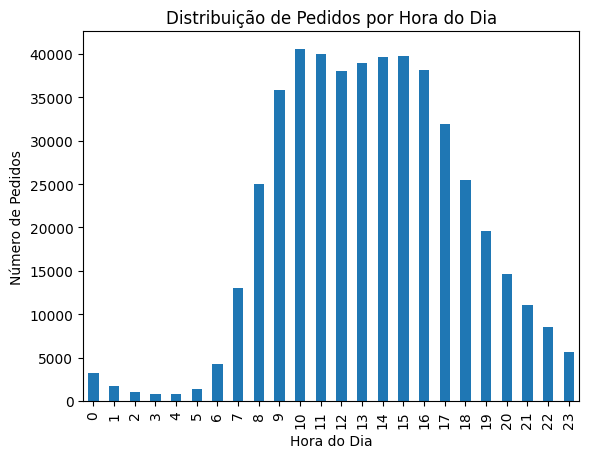

In [35]:
pedido_hora = orders_df['order_hour_of_day'].value_counts().sort_index()

pedido_hora.plot(kind='bar')
plt.title('Distribuição de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.show()



O gráfico mostra que os pedidos se concentram principalmente entre 8h e 16h, com picos às 9h e 15h, indicando maior atividade durante o horário comercial.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

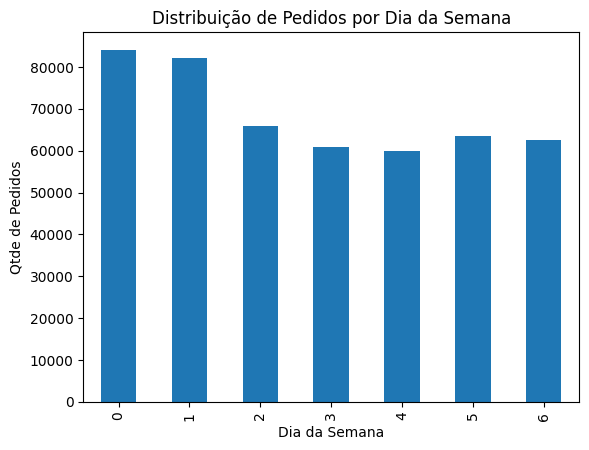

In [36]:
dia_semana = orders_df['order_dow'].value_counts().sort_index()

dia_semana.plot(kind='bar')
plt.title('Distribuição de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Qtde de Pedidos')
plt.show()

O gráfico mostra que a sexta-feira (dia 5) é o dia com o maior número de pedidos, enquanto o domingo (dia 6) tem a menor quantidade, indicando um aumento de atividade ao final da semana.
É basicamente a conclusao que coloquei no primeiro exercicio.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

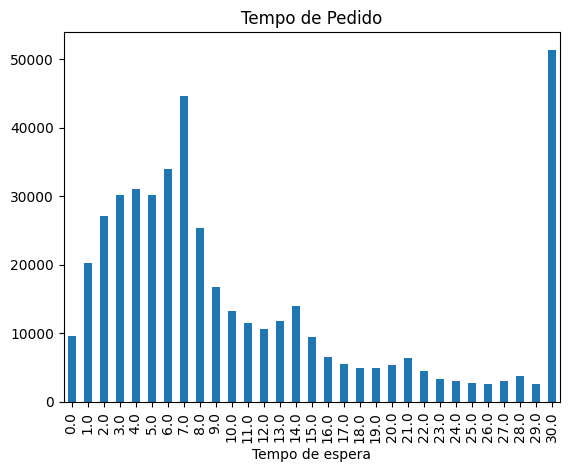

In [37]:
tempo_pedido = orders_df['days_since_prior_order'].value_counts().sort_index()

tempo_pedido.plot(kind='bar')
plt.title('Tempo de Pedido')
plt.xlabel('Tempo de espera')
plt.rot=45
plt.show()



O gráfico revela que a maioria dos pedidos é processada em um tempo muito curto com poucos pedidos levando mais tempo para serem concluídos.

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

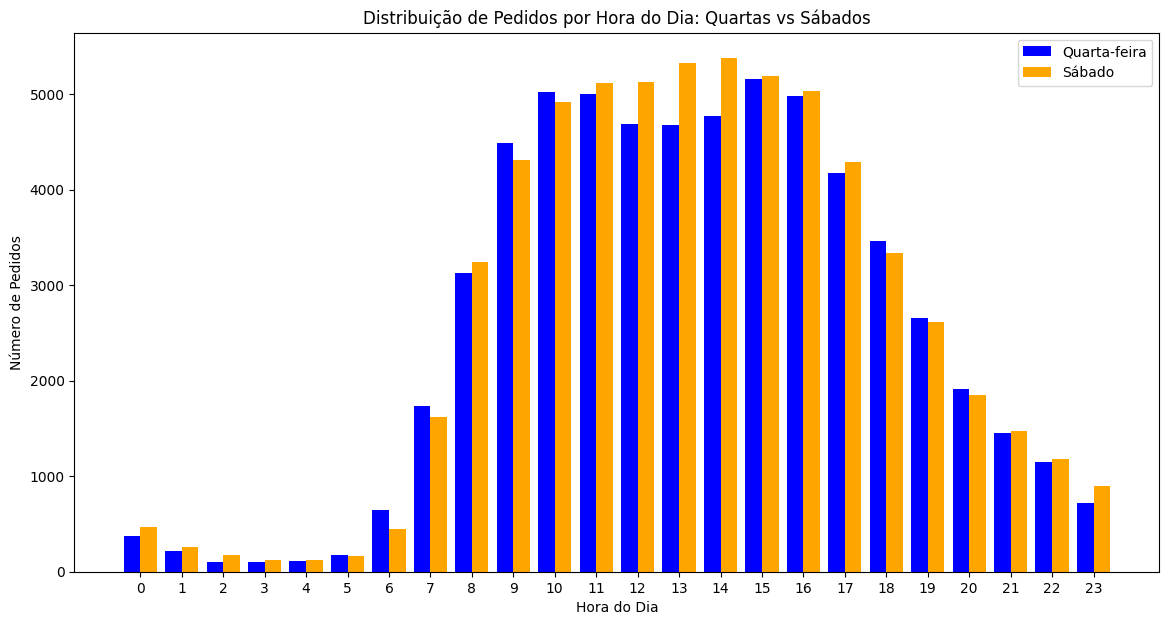

In [38]:
orders_wednesday = orders_df[orders_df['order_dow'] == 3]
orders_saturday = orders_df[orders_df['order_dow'] == 6]

hourly_distribution_wednesday = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_distribution_saturday = orders_saturday['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
plt.bar(hourly_distribution_wednesday.index - 0.2, hourly_distribution_wednesday.values, width=0.4, label='Quarta-feira', color='blue', align='center')
plt.bar(hourly_distribution_saturday.index + 0.2, hourly_distribution_saturday.values, width=0.4, label='Sábado', color='orange', align='center')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.title('Distribuição de Pedidos por Hora do Dia: Quartas vs Sábados')
plt.xticks(range(24))
plt.legend()
plt.show()



### [B2] Qual é a distribuição do número de pedidos por cliente?

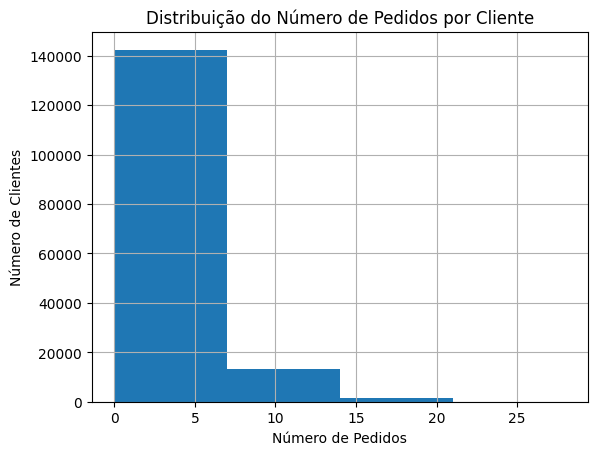

In [39]:
import matplotlib.pyplot as plt

pedidos_por_cliente = orders_df['order_number'].groupby(orders_df['user_id']).count()

plt.hist(pedidos_por_cliente, bins=4)
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()





A análise revela que a maioria dos clientes realiza um número relativamente baixo de pedidos, enquanto um pequeno grupo de clientes faz pedidos com frequência significativamente maior.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

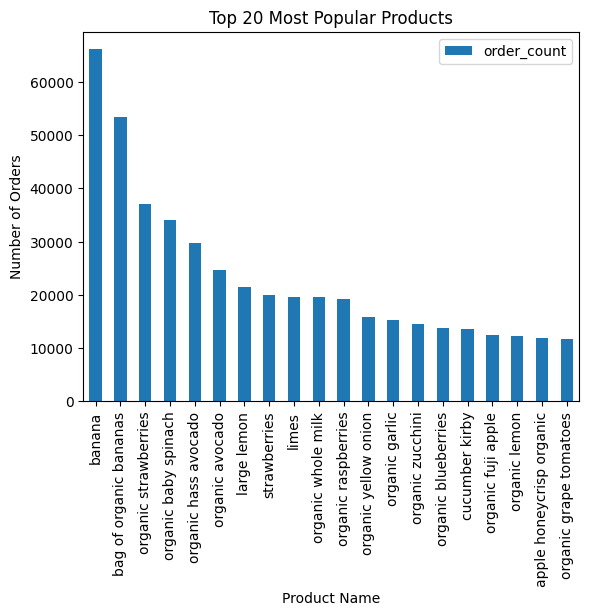

In [40]:
contagem_produtos = orderprod_df['product_id'].value_counts().reset_index()
contagem_produtos.columns = ['product_id', 'order_count']

merged_df = contagem_produtos.merge(
                                    products_df,
                                    left_on = 'product_id',
                                    right_on = 'product_id'
                                    )
top_20_products = merged_df.sort_values(by='order_count', ascending=False).head(20)

top_20_products[['product_id', 'product_name', 'order_count']]

top_20_products.plot(
    kind = 'bar',
    title = 'Top 20 Most Popular Products',
    x = 'product_name',
    y = 'order_count',
    xlabel = 'Product Name',
    ylabel = 'Number of Orders',
    rot = 90
)

plt.show()


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

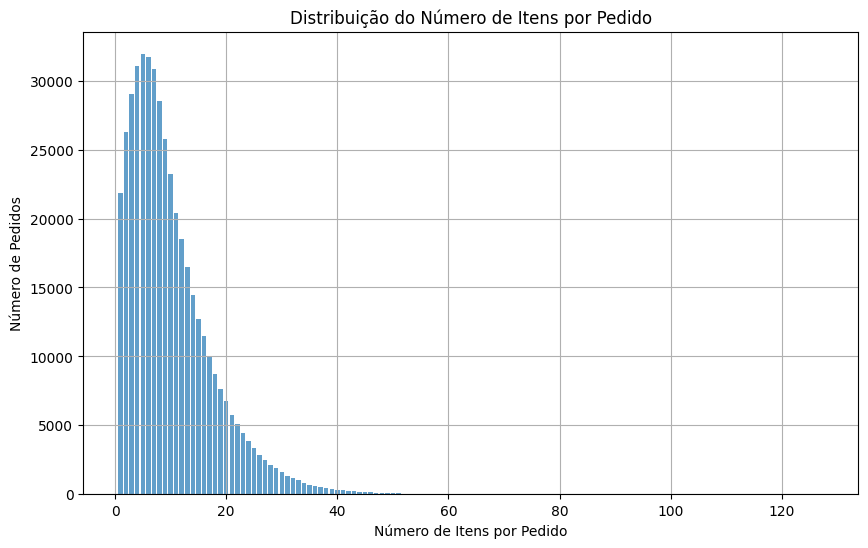

In [41]:
item_por_pedido = orderprod_df['product_id'].groupby(orderprod_df['order_id']).count()

qtde_comprada_item = item_por_pedido.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(qtde_comprada_item.index, qtde_comprada_item.values, alpha=0.7)
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()


### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

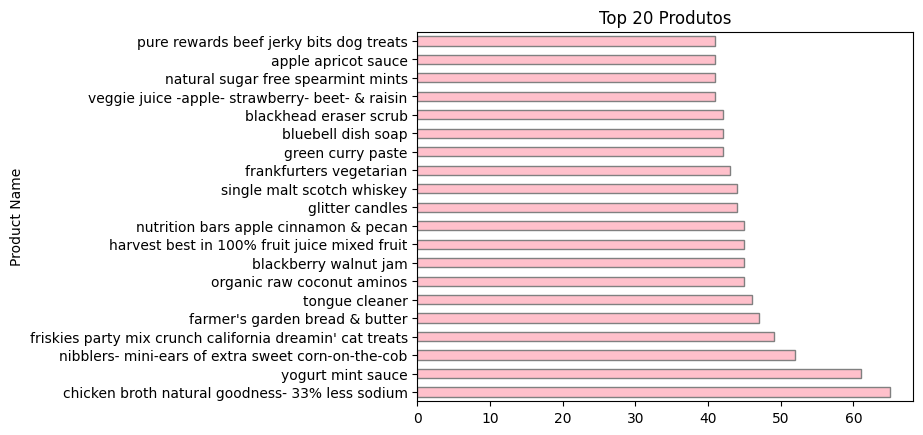

In [42]:
top_20_produtos = orderprod_df.groupby('order_id')['reordered'].count()

top_20_product_counts = top_20_produtos.reset_index()
top_20_product_counts.columns = ['product_id', 'reordered'] 
merged_df_20_products = top_20_product_counts.merge(    products_df,
                                                        left_on = 'product_id',
                                                        right_on = 'product_id'
                                                        )
top_20_products_repeated = merged_df_20_products.sort_values(by='reordered', ascending=False).head(20) 

top_20_products_repeated[['product_id', 'product_name', 'reordered']] 

top_20_products_repeated.plot(
    kind = 'barh',
    title = 'Top 20 Produtos',
    x = 'product_name',
    y = 'reordered',
    xlabel = 'Product Name',
    ylabel = 'Number of Orders',
    edgecolor='grey', 
    color='pink',
    legend = False
)

plt.show()



### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

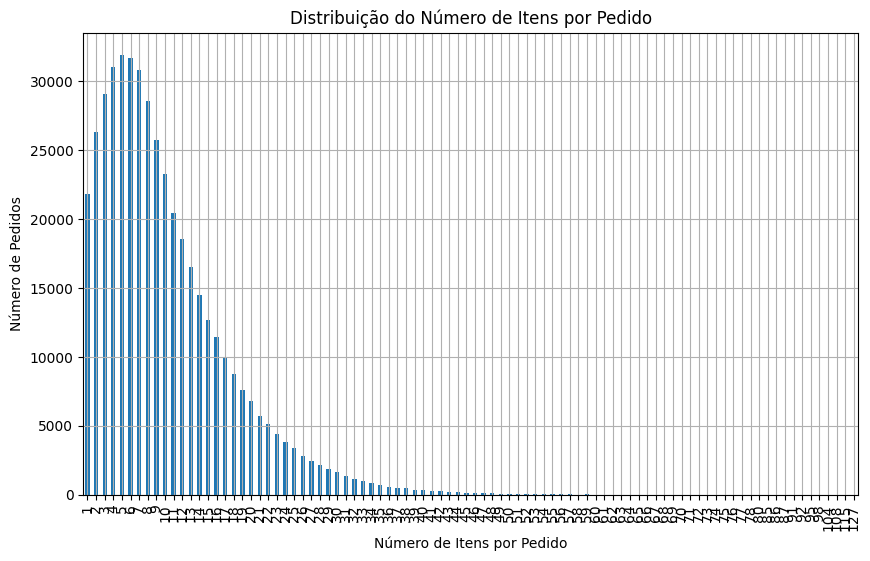

In [43]:
repeticao_item_pedido = orderprod_df['product_id'].groupby(orderprod_df['order_id']).count()

qtde_comprada_item =repeticao_item_pedido.value_counts().sort_index()

plt.figure(figsize=(10, 6))
qtde_comprada_item.plot(kind='bar')
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens por Pedido')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

A análise do gráfico de barras que representa a distribuição do número de itens por pedido revela que a maioria dos pedidos contém um pequeno número de itens, com um pico significativo em torno de um ou dois itens por pedido.

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Feito.
</div>

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [ ]:
merge_df = orders_df.merge(orderprod_df, on = 'order_id', how = 'inner')
reorder_proportion_per_client = merge_df.groupby('user_id').agg(total_orders = ('order_id', 'count'), total_reorders = ('reordered', 'sum'))

reorder_proportion_per_client['reorder_proportion'] = reorder_proportion_per_client['total_reorders'] / reorder_proportion_per_client['total_orders']
reorder_proportion_per_client.head(20)

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [ ]:
top_20_order_item = orderprod_df.sort_values(by='add_to_cart_order').head(20)

top_20_order_item_unique = top_20_order_item[['product_id', 'add_to_cart_order']].drop_duplicates()

ordem_20_itens_inclusos = top_20_order_item_unique.merge(
    products_df[['product_id', 'product_name']], on='product_id'
)

print(ordem_20_itens_inclusos)

df_merge = orderprod_df.merge(products_df)

primeiro_incluido = df_merge[df_merge['add_to_cart_order'] == 1]
primeiro_incluido = primeiro_incluido.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
primeiro_incluido_df = primeiro_incluido.reset_index(name='count')

primeiro_incluido_df.head(20)



# Conclusão geral do projeto:

A análise revelou que as compras são mais frequentes aos domingos e segundas-feiras, com picos entre 10h e 16h e menor movimento entre 03h e 04h. A distribuição das compras varia entre quartas-feiras e sábados, especialmente entre 10h e 15h. A maioria dos clientes faz poucos pedidos, com um intervalo médio de 30 dias entre compras. Em média, cada compra inclui 10 produtos, predominando verduras e frutas. Além disso, muitos dos produtos mais comprados são adquiridos regularmente.